<a href="https://colab.research.google.com/github/Benbuk/GOMYCODE_DS_Bootcamp/blob/main/Supervised_Learning_Regression_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


# Objective

---


In this checkpoint, you are going to work on the '5G-Energy consumption' dataset that was provided by the international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

The competition is taking place from 2023-07-05 to 2023-09-30. Fore more information click here.


[Dataset](http://https://drive.google.com/file/d/1vW9TA7KAn-OJjD_o9Rd0l6sx77wNaiuk/view)


Follow These Steps

1. Import you data and perform basic data exploration phase
Display general information about the dataset
> Create a pandas profiling reports to gain insights into the dataset
> Handle Missing and corrupted values
> Remove duplicates, if they exist
> Handle outliers, if they exist
> Encode categorical features
2. Select your target variable and the features
8. Split your dataset to training and test sets
9. Based on your data exploration phase select a ML regression algorithm and train it on the training set
5. Assess your model performance on the test set using relevant evaluation metrics
6. Discuss with your cohort alternative ways to improve your model performance


#1.0 Importing librararies and the dataset

In [ ]:
#importing the needed libraries
!pip install pandas-profiling #install Ydata Profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ydata_profiling as ydp # Import the Ydata_profiling library that have been installed
import profile # Imports profile for creating html or notebook from ydata_profiling results
from ydata_profiling import ProfileReport

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1e73db7a26366b3db2f9e51a78496546f4b7f084b4ad8e2bf907aeb16f26b4b3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling

In [ ]:
# importing data
Energy_data_5G = pd.read_csv('/content/5G_energy_consumption_dataset.csv')

#2.0 Data Exploration and Cleaning

2.1 Overall, the dataset contains 92,269 observations with zero null values. The "BS_encoded" is of the object datatype and had to converted to nnumeral value using LabelEnconder.




In [ ]:
#general overview of the datatypes and structures
Energy_data_5G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [ ]:
#overview of the dataframe
Energy_data_5G.head()

Time   BS     Energy      load  ESMODE   TXpower
0  20230101 010000  B_0  64.275037  0.487936     0.0  7.101719
1  20230101 020000  B_0  55.904335  0.344468     0.0  7.101719
2  20230101 030000  B_0  57.698057  0.193766     0.0  7.101719
3  20230101 040000  B_0  55.156951  0.222383     0.0  7.101719
4  20230101 050000  B_0  56.053812  0.175436     0.0  7.101719

In [ ]:
#check for null values in the dataframe
Energy_data_5G.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

2.2 Using LabelEncoder to map the change the BS_encoder column from categorical to numerical

In [ ]:
# Transform 'counter_type' feature to a numeric variable (example: using LabelEncoder)
from sklearn.preprocessing import LabelEncoder

Energy_data_5G['BS_encoded'] = LabelEncoder().fit_transform(Energy_data_5G['BS'])


2.3 The heatmap chart from the Ydata Profiling result shows, Energy and load has the strongest positive correlation which can also be seen the scatterplot graph between energy and load. There are some positive correlations between BS_encoded and ESMODE, Energy and TXpower, and load and TXpower. There are some negative correlations between BS_encoded and Energy, ESMODE and load, and Energy and load. The rest of the correlations are close to zero or very weak.

In [ ]:
#Creates a Ydata profile to explore and understand the relationship between the variables
Energy_data_5G_DataProfile = ProfileReport(Energy_data_5G, title = "5G Energy Consumption Profile")
#Generates the profile
Energy_data_5G_DataProfile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

2.4 Creating scatter plots to better visualize the relationships between the features

In [ ]:
#creating a scatter
fig = px.scatter(Energy_data_5G, y = 'Energy', x = 'TXpower')

fig.update_layout(
    title = 'Energy and TXpower',
    yaxis_title = 'Energy',
    xaxis_title = 'TXpower'
)

fig.show()

In [ ]:
#creating a scatter plot
fig = px.scatter(Energy_data_5G, y = 'Energy', x = 'BS_encoded')

fig.update_layout(
    title = 'Energy and BS_encoded',
    yaxis_title = 'Energy',
    xaxis_title = 'BS_encoded'
)

fig.show()

In [ ]:
#creating a scatter
fig = px.scatter(Energy_data_5G, y = 'Energy', x = 'load')

fig.update_layout(
    title = 'Energy and load',
    yaxis_title = 'Energy',
    xaxis_title = 'load'
)

fig.show()

2.5 Using boxplots to check for outliers and then excluding them using interquatile range method

<Axes: >

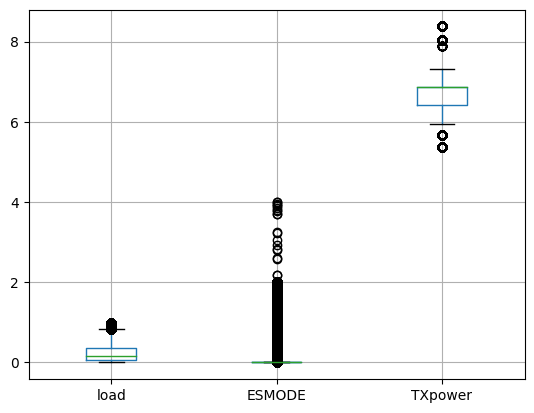

In [ ]:
#Identifying outliers
Energy_data_5G.boxplot(['load', 'ESMODE', 'TXpower'])

In [ ]:
#Using interquatile range to remove outliers from the dataset
#Find the Q1, Q3, and IQR for each column
Q1 = Energy_data_5G.quantile(0.25)
Q3 = Energy_data_5G.quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers from the dataframe
Energy_data_5G_outliers = Energy_data_5G[~((Energy_data_5G < (Q1 - 1.5 * IQR)) | (Energy_data_5G > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the original and cleaned dataframe
print("Original dataframe shape:", Energy_data_5G.shape)
print("Cleaned dataframe shape:", Energy_data_5G_outliers.shape)

Original dataframe shape: (92629, 7)
Cleaned dataframe shape: (82039, 7)


<ipython-input-53-84b28c943e0c>:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-53-84b28c943e0c>:4: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-53-84b28c943e0c>:8: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



#3.0 Splitting, Training and Testing the model

In [ ]:
# Create some sample data
x = Energy_data_5G_outliers[['TXpower', 'load']]  # Add your feature columns
y = Energy_data_5G_outliers[['Energy']]  # Your dependent variable

# Create a polynomial feature transformer with degree 2
poly = PolynomialFeatures(degree=3)

# Transform the input data
X_poly = poly.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit a linear regression model using the polynomial features on the training set
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# Predict the output for the training set
predicted_2 = model_2.predict(X_train)

# Calculate Mean Squared Error (MSE) and R-squared (R²) for training set
mse_train = mean_squared_error(y_train, predicted_2)
r2_train = r2_score(y_train, predicted_2)

# Print the training set results
print(f"Training Set Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Training Set R-squared (R²): {r2_train:.2f}")

Training Set Mean Squared Error (MSE): 62.57
Training Set R-squared (R²): 0.54


4.1 Improving model using using polynomial feature

Polynomial features of degree 3 resulted in a slight improvement of the model’s R-squared value, from 0.47 to 0.54 and MSE, from 71.96 to 62.57.

In [ ]:
# Extract X and y from your data
x = Energy_data_5G_outliers[['TXpower', 'load']]  # Add your feature columns
y = Energy_data_5G_outliers['Energy']  # Your dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
predicted = model.predict(X_test)

# Evaluate the model
print("MSE:", mean_squared_error(y_test, predicted))
print("R squared:", r2_score(y_test, predicted))

MSE: 71.96462755881029
R squared: 0.4738339894110535


#4.0 Interpretting and Using the Model to make predictions

From the Model, the MSE is 71.96 and Rquared value is 0.47. The R squared value is low and needs to be improved in order to make the model usable\. Including the other features in the dataset(BS_encoded and ESMODE) has no effect on the outcome of the regression model.

In [ ]:
# Prepare new data for prediction with the model without outliers
Sample_data = pd.DataFrame({'TXpower': [7, 3], 'load': [0.6, 0.77]})

# Transform the new input data using the same polynomial features
X_new_poly = poly.transform(X_new)

# Predict the output for the new input
y_new_predicted = model_2.predict(X_new_poly)

# Print the predicted energy for the new input
print("Predicted Energy for the New Input:", round(y_new_predicted[0][0], 2))


Predicted Energy for the New Input: 31177.2
